In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import pickle

In [41]:

## Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Creating a function transformer
from sklearn.preprocessing import FunctionTransformer

## For Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector


## For preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## For missing values
from sklearn.impute import SimpleImputer

## Getting the recall score on our train set
from sklearn.metrics import recall_score

## Getting the accuracy score on train set
from sklearn.metrics import accuracy_score

## Getting the classification report from our train set
from sklearn.metrics import classification_report

## Cross validation
from sklearn.model_selection import cross_val_score

## Gridsearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Imbalanced pipeline and SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [42]:
## printing the shape and head
def head(df,shape_only=False):
    print(df.shape)

    if shape_only:
        return
    else:
        return df.head()

## for EDA of categorical values
def eda_bivariate_categorical(df,column,target):

    fig,ax = plt.subplots(figsize = (9,8))

    color = 'Set2'

    palette_color = sns.color_palette(color)

    ax = sns.countplot(x = column, data=df, hue=target,palette=color,order = df[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = df[column].value_counts().max() * 0.005

    list_bars = df.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(df[target].nunique()):
        for j in range(df[column].nunique()):
            list_bars_col = list_bars[j] 
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1
    plt.show()

## Function that plots numerical variables into histogram and violin plot
def eda_bivariate_numerical(data,column,target,color,
                    figsize=(12,6),
                    # save=True,
                    val=0,
                    target_type = 'Numerical'):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    cmap = sns.color_palette(color)
    val = val

    for i in range(1):
        for j in range(2):
            if j==0:
                    sns.histplot(data = data,x=data[column],hue=target,
                                bins=50,kde=True,palette=color,ax=axes[j])
                    axes[j].set(xlabel=None)
                    axes[j].grid(False)
            elif j==1:
                sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',
                )
                axes[j].set(xlabel=None)
                axes[j].grid(False)
                val += 1
                plt.tight_layout()
            if target_type == 'Numerical':
                plt.suptitle(column)
            else:
                plt.suptitle(f'{column} vs. {target}')
    plt.show()
    
    # path = 'Figures\\Numerical\\'
    # if save:
    #     plt.savefig(f"{path}{column}.pdf",dpi=1000)


## print text to see the font
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
    ax.axis("off")
    plt.show()

In [43]:
df = pd.read_csv('cleaned.csv')
target = 'Heart Disease'

In [44]:
## Creating numerical and categorical columns
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

## Printing the length of numerical and categorical. The total length should have
## the same length as our dataframe
print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 12 Categorical variables
There are 3 Numerical variables


In [45]:
df.columns.sort_values()

## Showing the descriptions of numerical variables
print('')
num_describe = df.describe().T
num_describe_table = num_describe.loc[:,['mean', 'std', '25%', '50%', '75%']]
print(num_describe_table)

## Showing the descriptions of categorical variables
print('')
object_describe_table = df.describe(include=object)
print(object_describe_table)


                           mean        std     25%     50%     75%
Alcohol Consumption    9.172491   9.171068    2.00    5.00   14.00
Height (cm)          171.705309  10.459473  163.00  173.00  180.00
Weight (kg)           83.388845  20.653873   68.04   81.65   95.25
BMI                   28.178145   6.105889   24.03   27.26   31.19

       General Health               Checkup Skin Cancer Other Cancer  \
count          197013                197013      197013       197013   
unique              5                     4           2            2   
top         Very Good  Within the past year          No           No   
freq            77110                153857      180317       176035   

       Depression Diabetes Smoking History Exercise Heart Disease Arthritis  \
count      197013   197013          197013   197013        197013    197013   
unique          2        4               2        2             2         2   
top            No       No              No      Yes            No

## Univariate Analysis

General Health


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


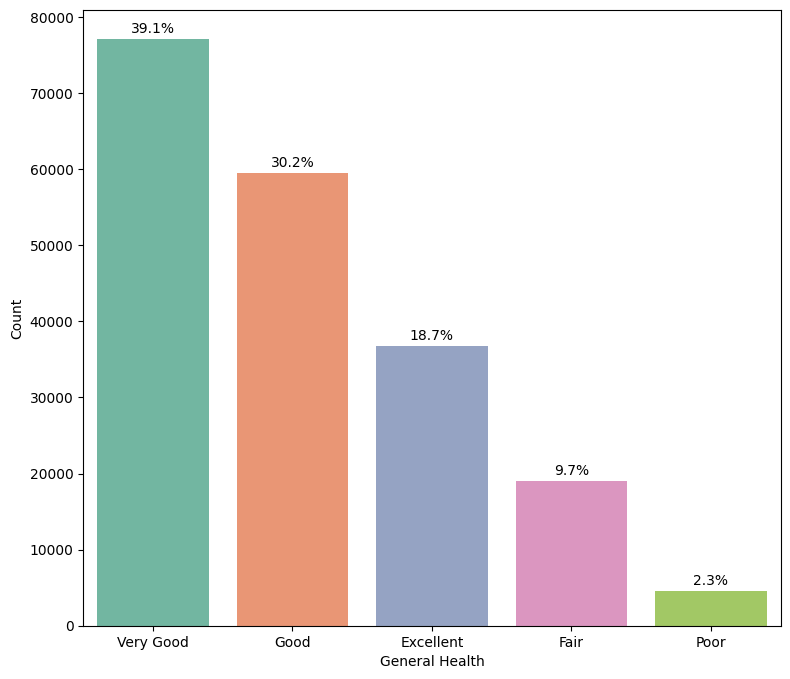

Checkup


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


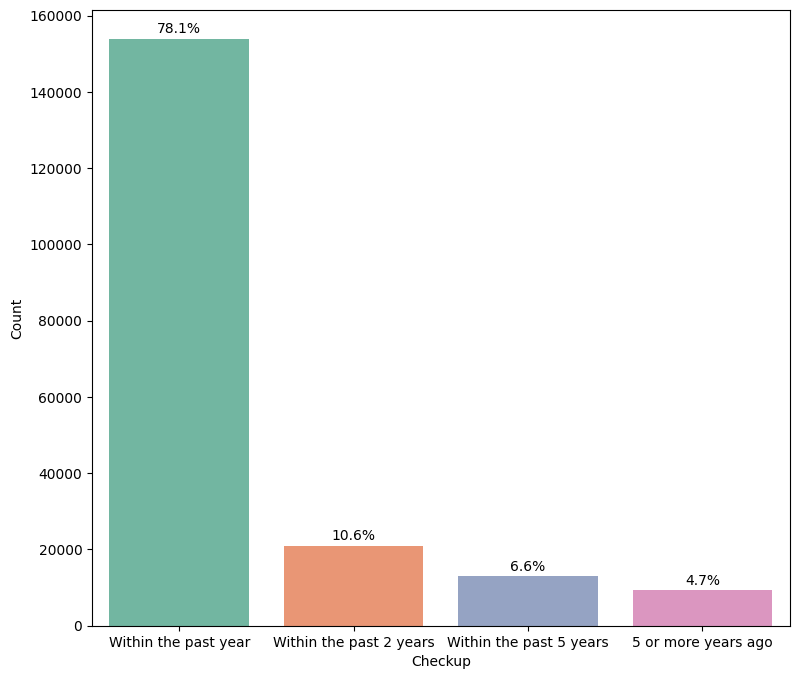

Skin Cancer


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


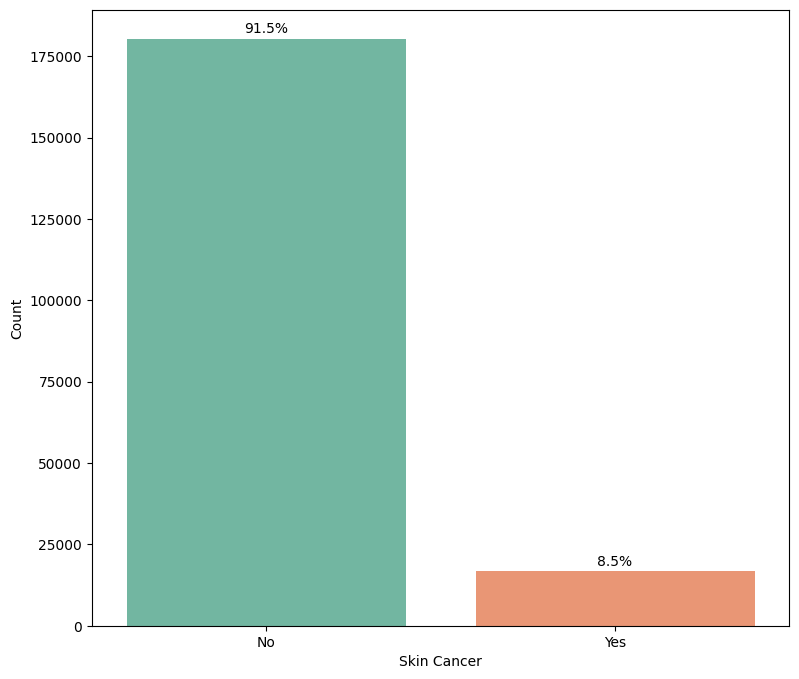

Other Cancer


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


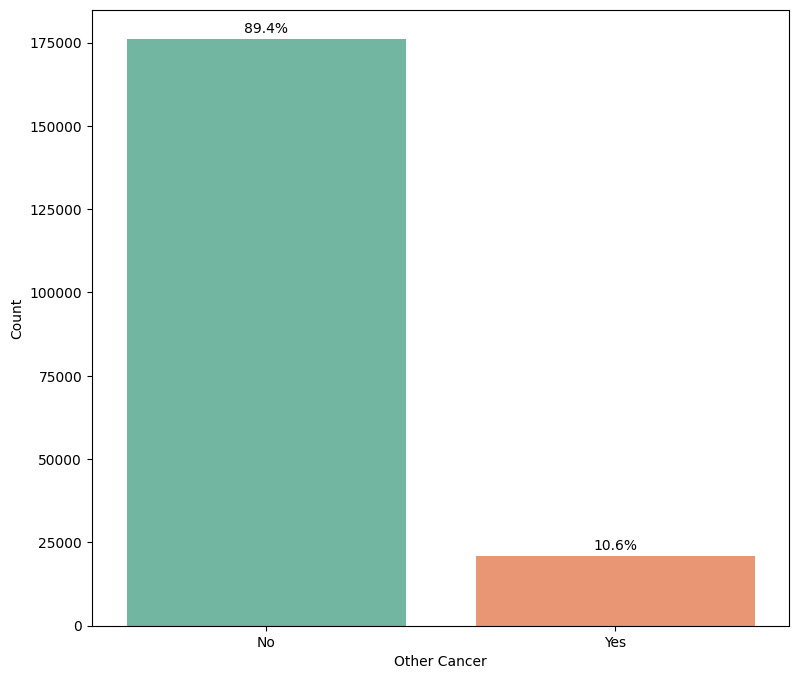

Depression


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


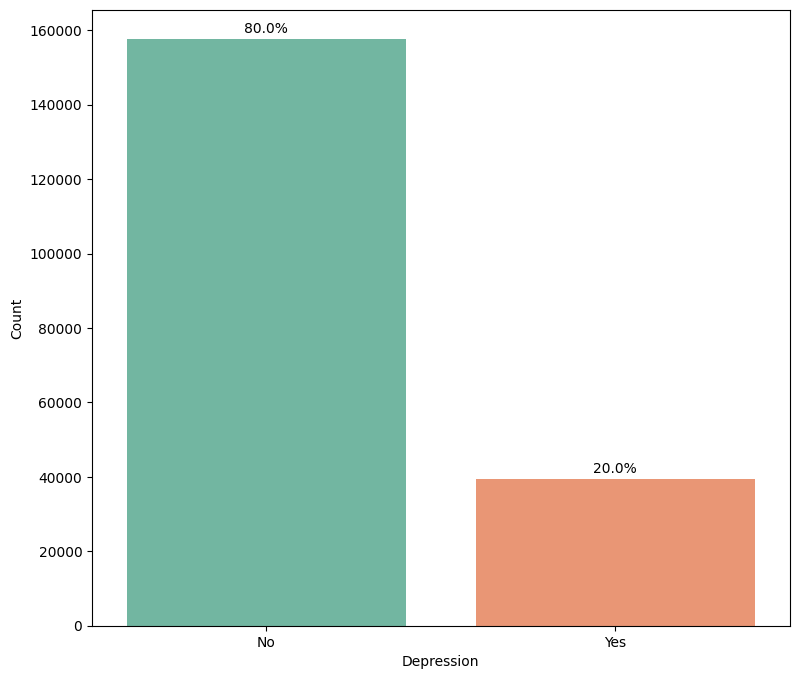

Diabetes


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


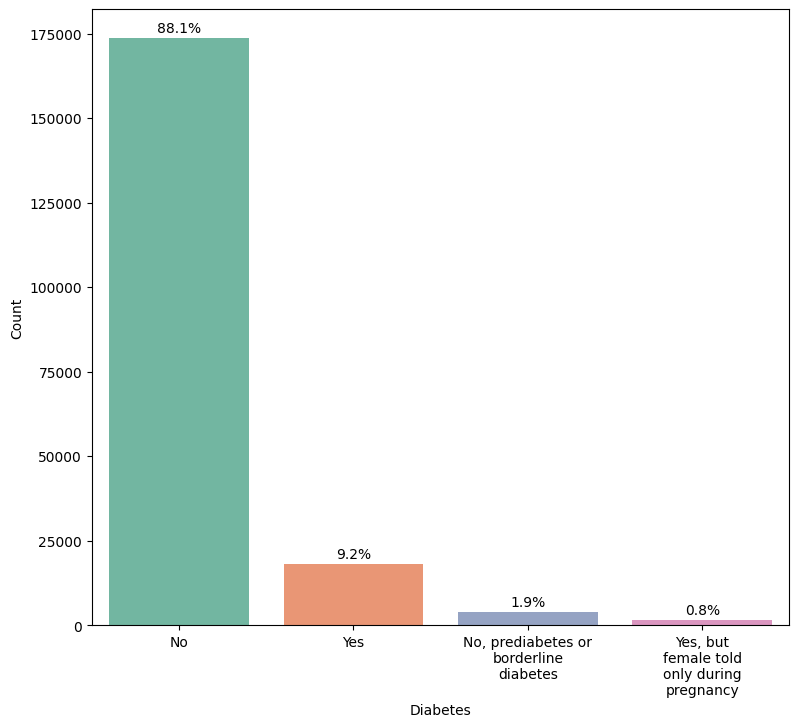

Smoking History


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


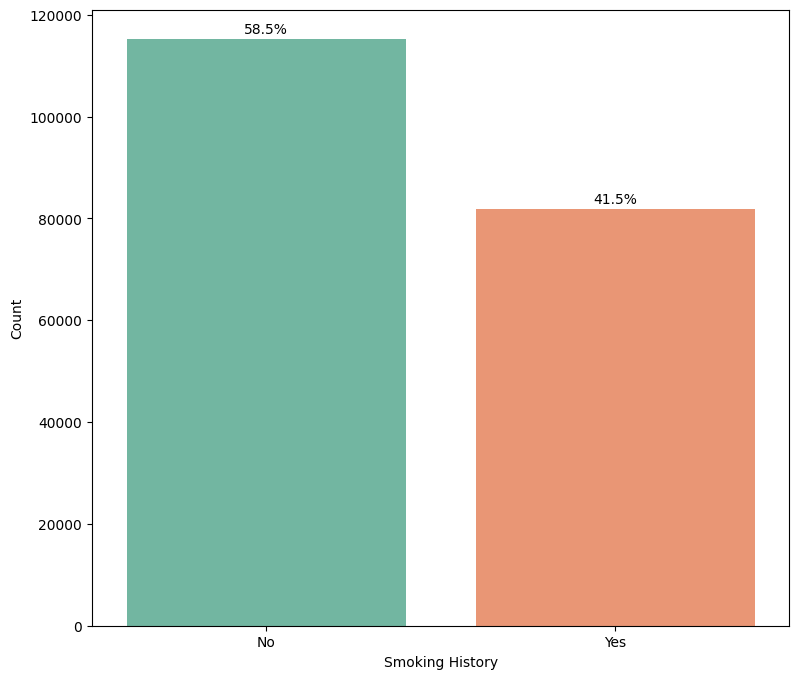

Exercise


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


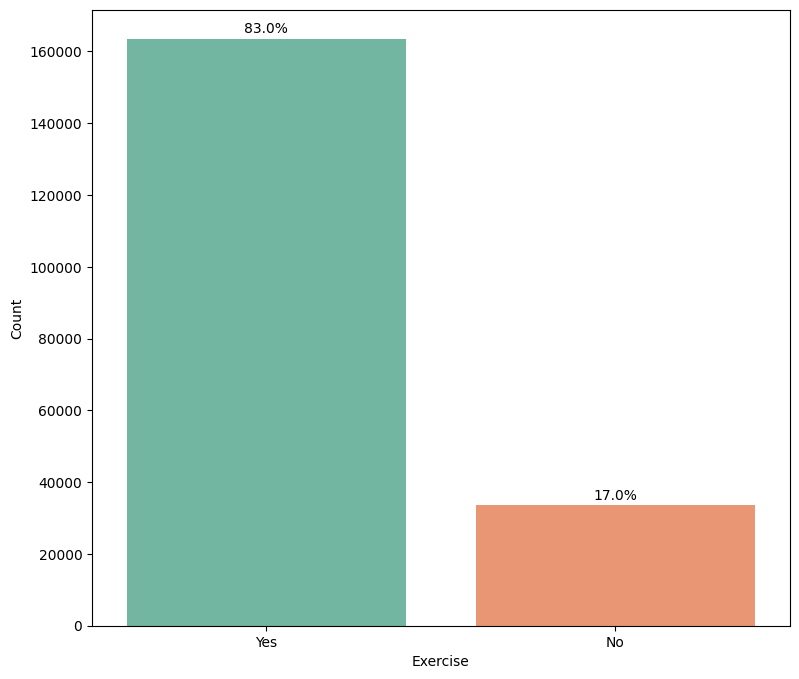

Arthritis


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


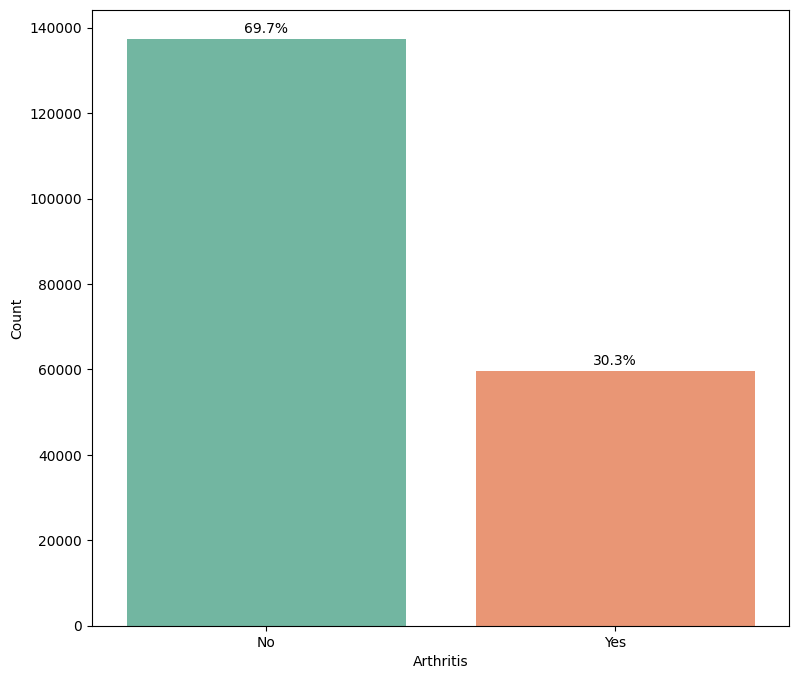

Sex


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


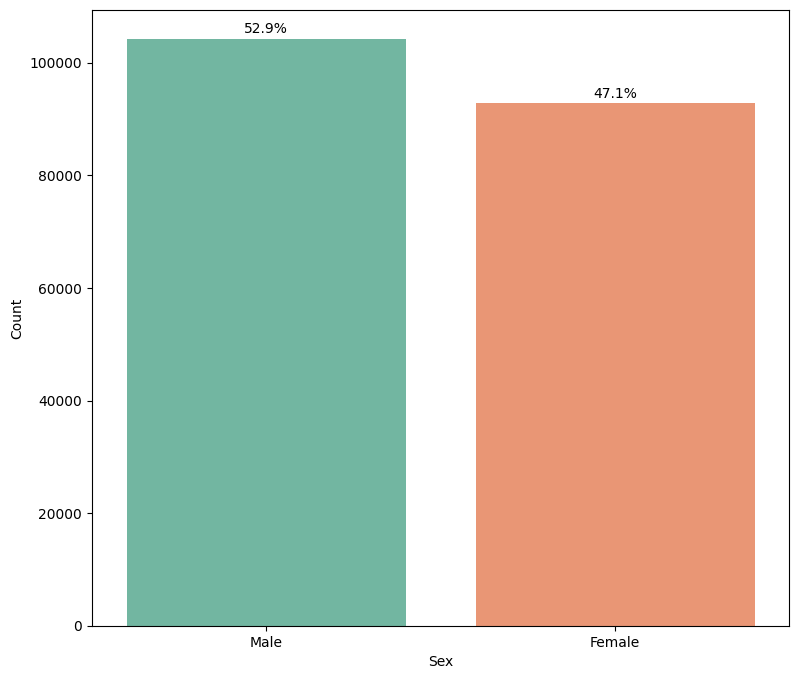

Age


/var/folders/4m/9m4fz6y57jd2vpps2l76rrsh0000gn/T/ipykernel_26911/93678402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


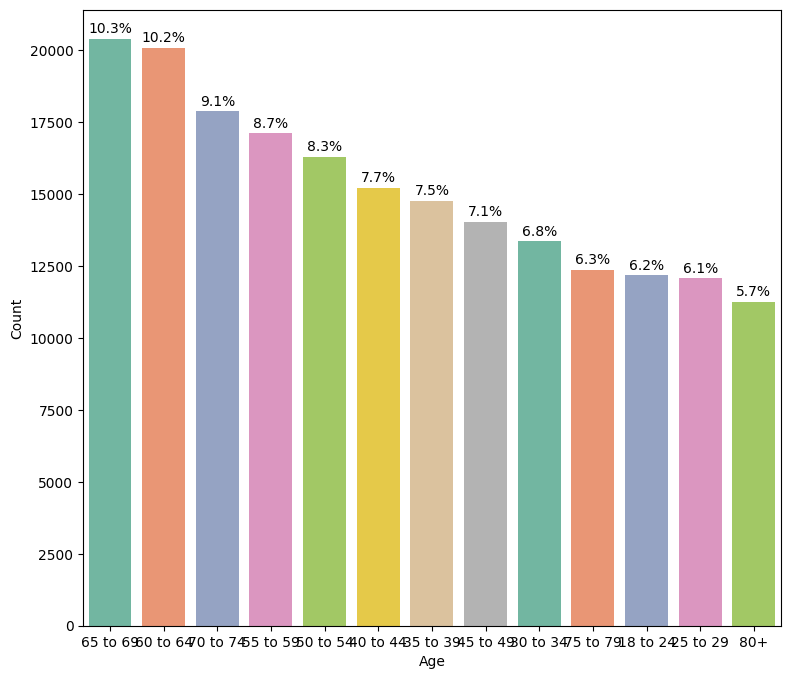

Height (cm)


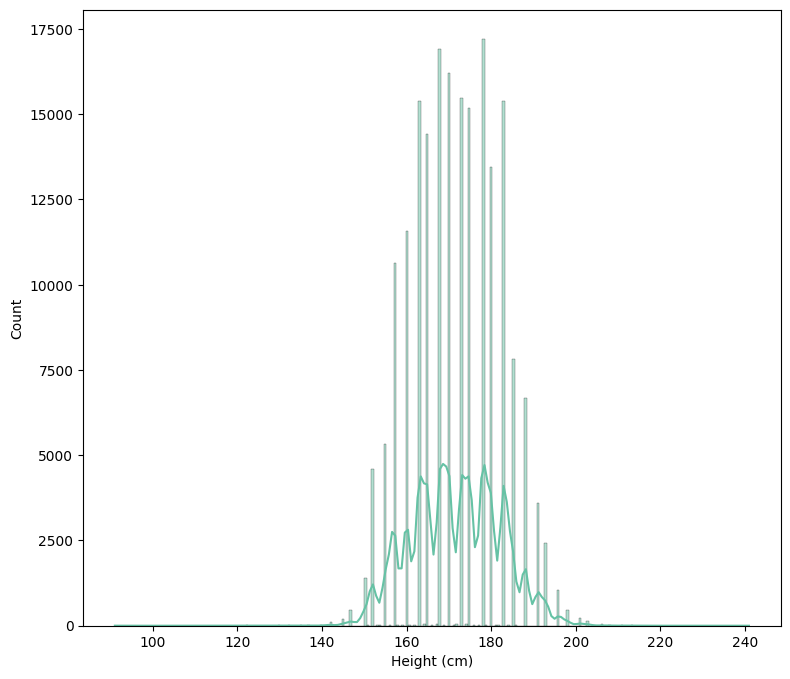

Weight (kg)


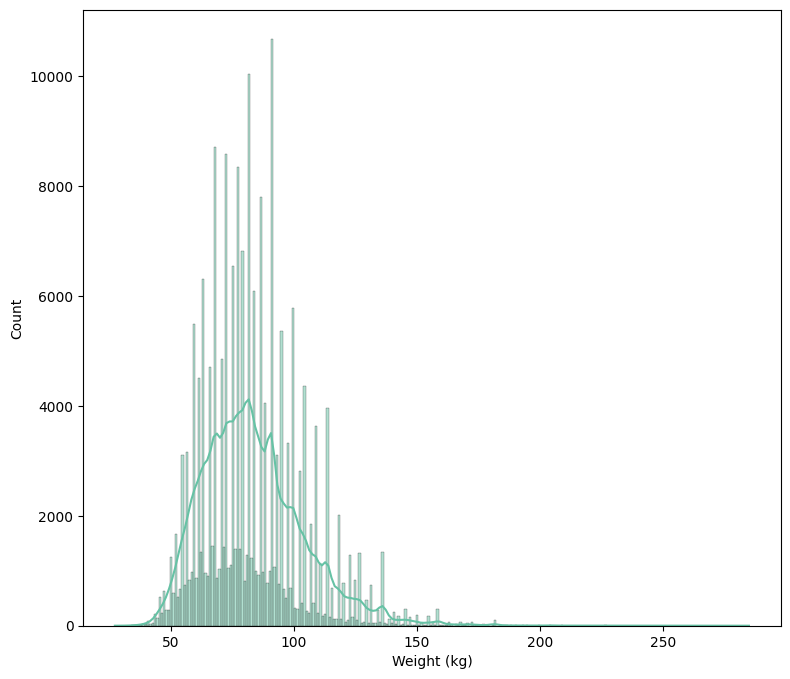

BMI


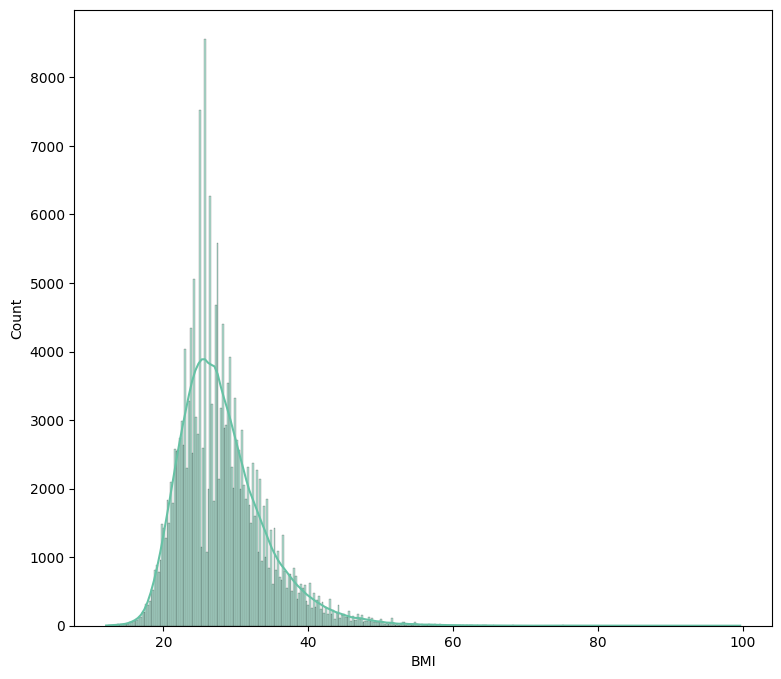

In [46]:
for i in df.columns:
    
    if i == target:
        continue

    if i in categorical:
        if df[i].nunique() > 15:
            print(f'column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue
        else:
            print(f'{i}')
            fig,ax = plt.subplots(figsize = (9,8))
            color = 'Set2'
            palette_color = sns.color_palette(color)
            ax = sns.countplot(x = i, 
                data=df,
                palette=color,
                order = df[i].value_counts().index
                )
            ax.set_ylabel('Count')

            patches = ax.patches

            for j in range(len(patches)):
                # list_unq_val = list(df[i].unique())

                # cleaned = [x for x in list_unq_val if str(x) != 'nan']
                offset = df[i].value_counts().max() * 0.01
                percentage = list(df[i].value_counts())[j]/df[i].value_counts().sum()
                x = patches[j].get_x() + patches[j].get_width()/2
                y = patches[j].get_height()+ offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                
            plt.show()
            print('=======================================================')
    
    elif i in numerical:
        print(f'{i}')
        fig,ax = plt.subplots(figsize = (9,8))
        color = 'Set2'
        palette_color = sns.color_palette(color)
        ax = sns.histplot(x = i, 
                data=df,
                # bins = 'auto',
                # bins = 50,
                kde = True,
                color=palette_color[0],
                )
        ax.set_ylabel('Count')
        plt.show()
        print('=======================================================')

## Bivariate Analysis

Age vs. Heart Disease


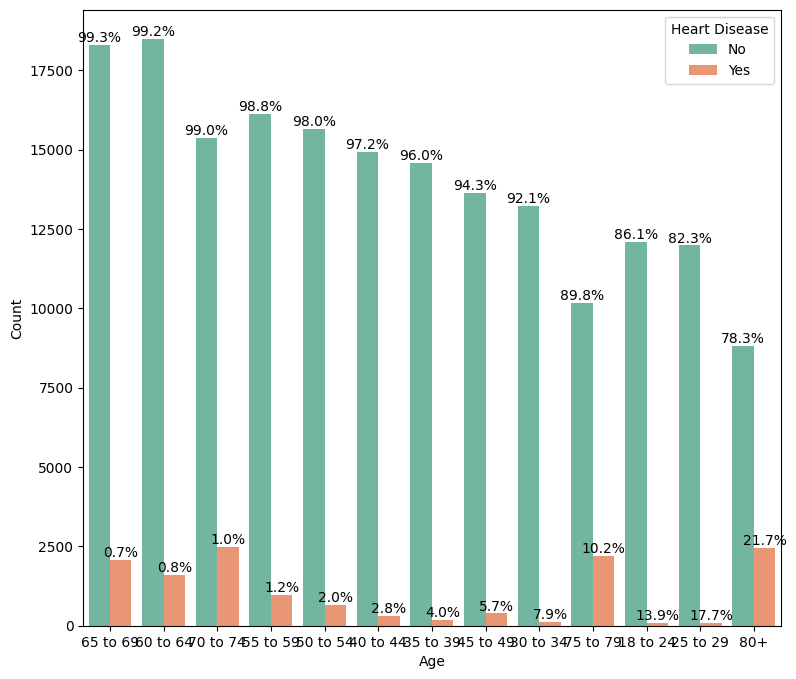

Arthritis vs. Heart Disease


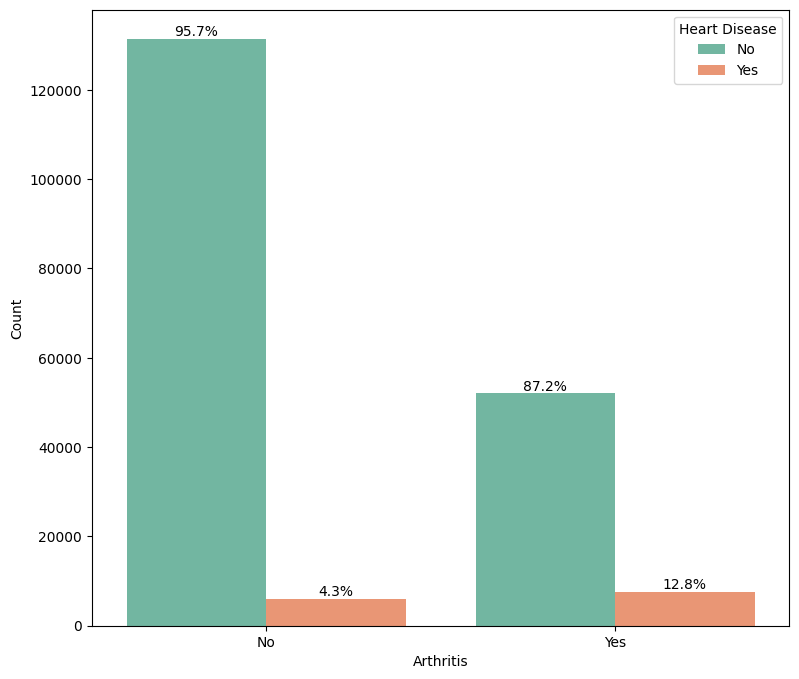

Checkup vs. Heart Disease


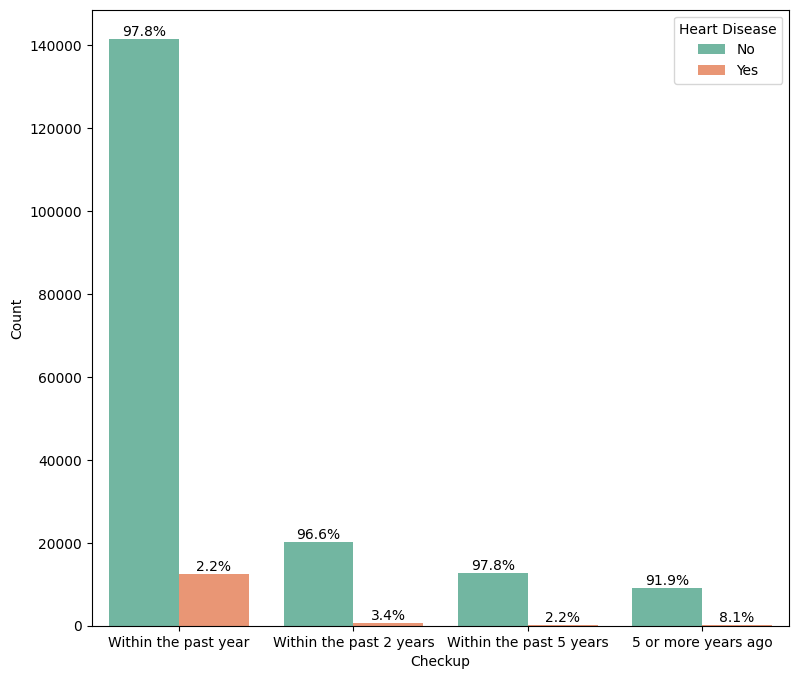

Depression vs. Heart Disease


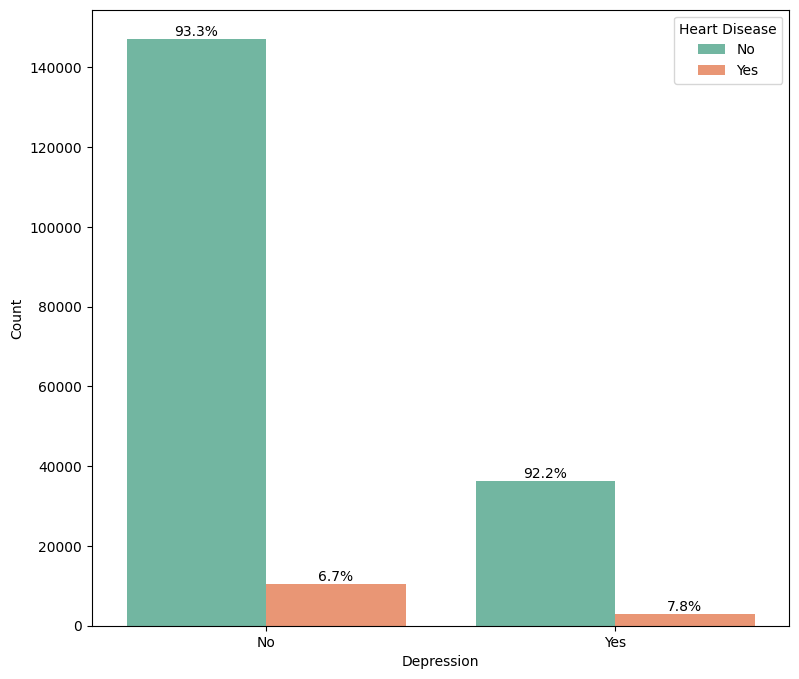

Diabetes vs. Heart Disease


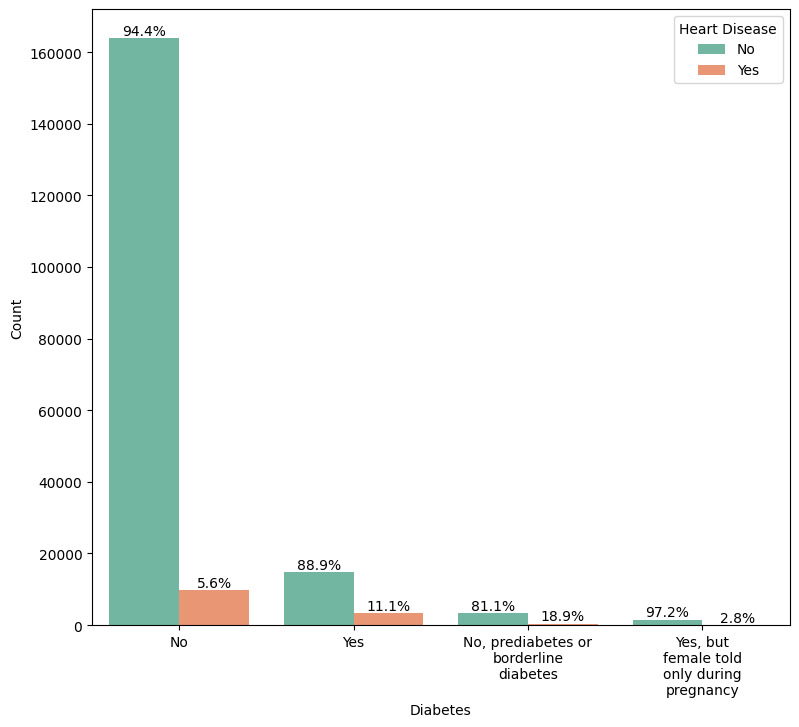

Exercise vs. Heart Disease


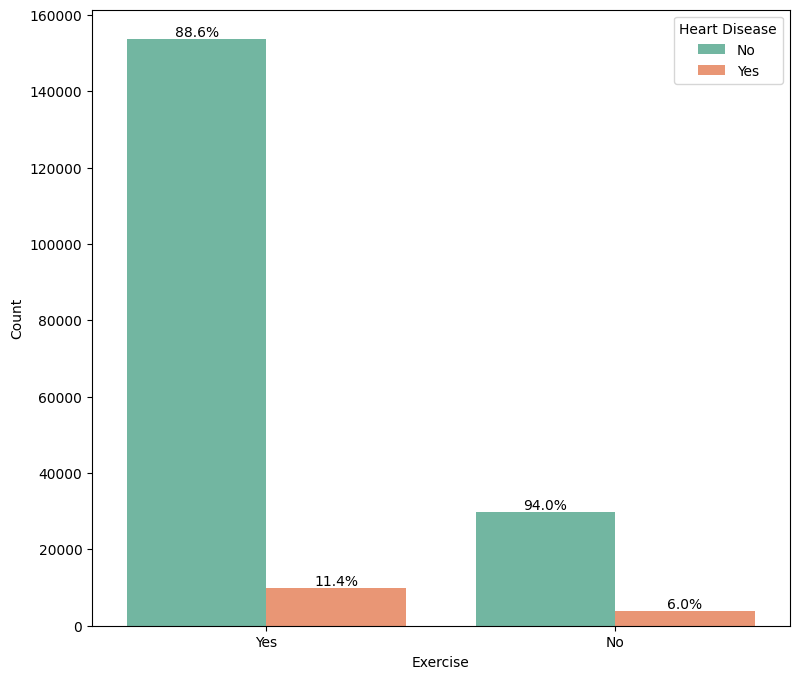

General Health vs. Heart Disease


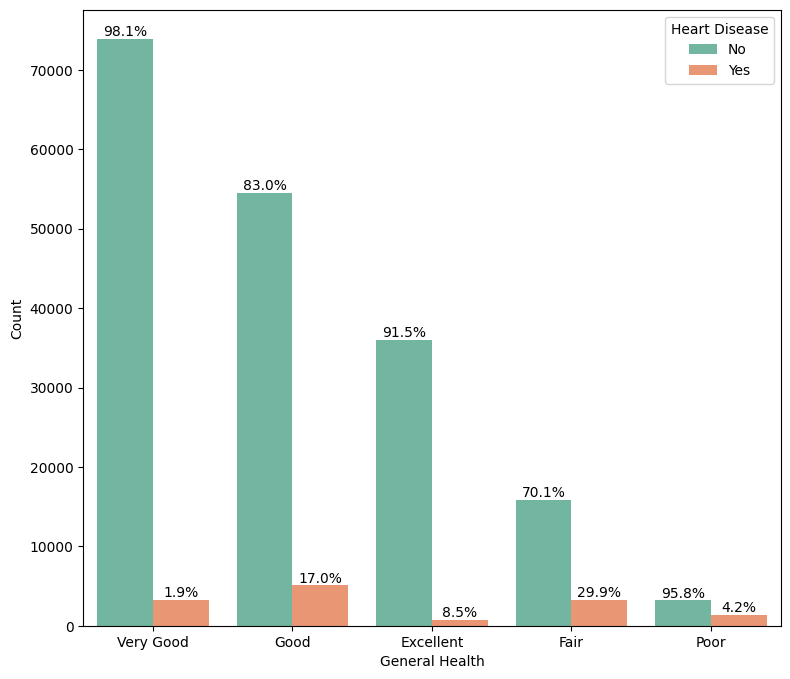

Other Cancer vs. Heart Disease


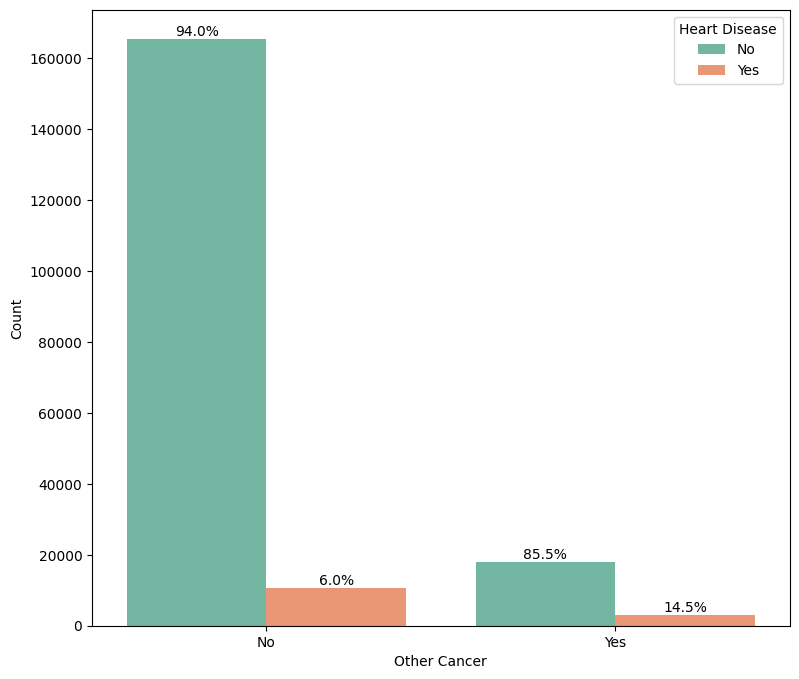

Sex vs. Heart Disease


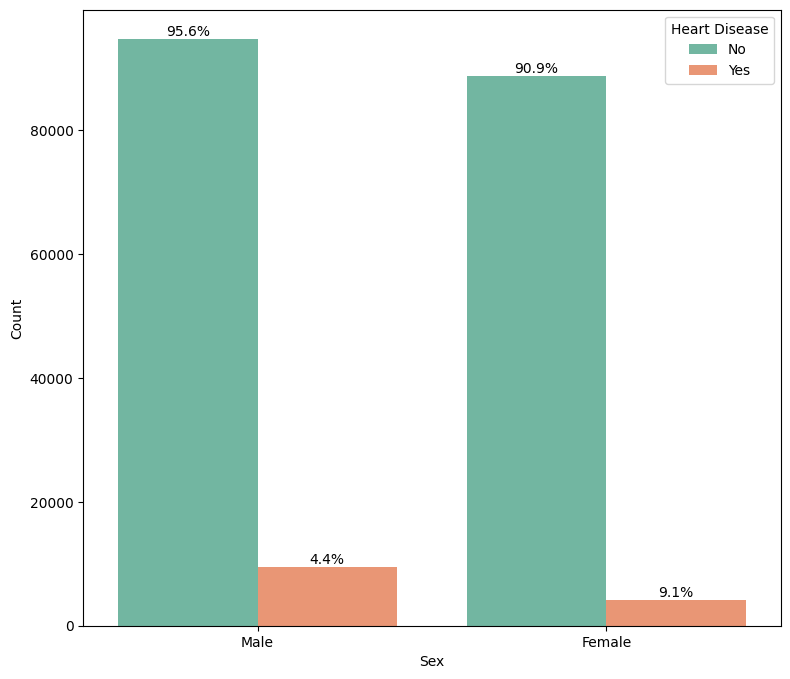

Skin Cancer vs. Heart Disease


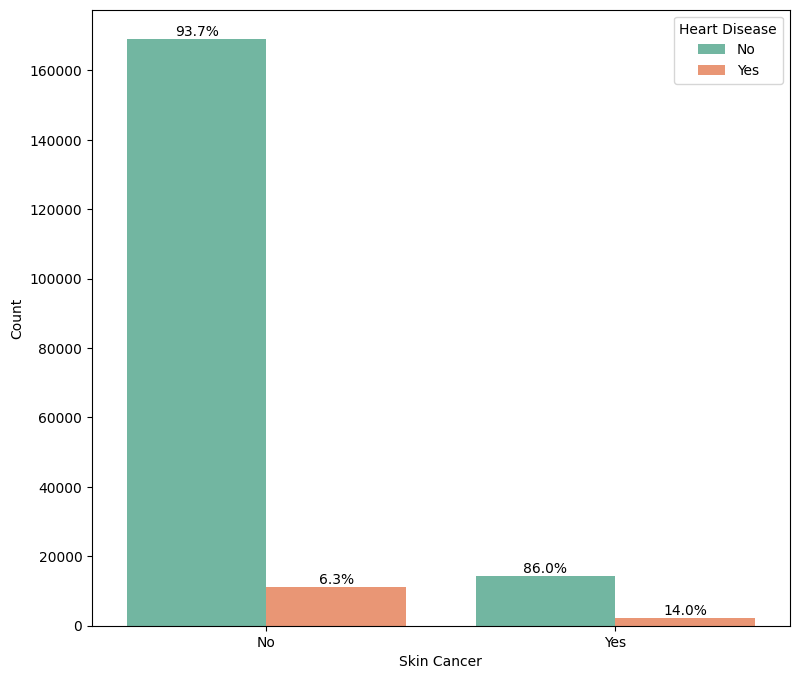

Smoking History vs. Heart Disease


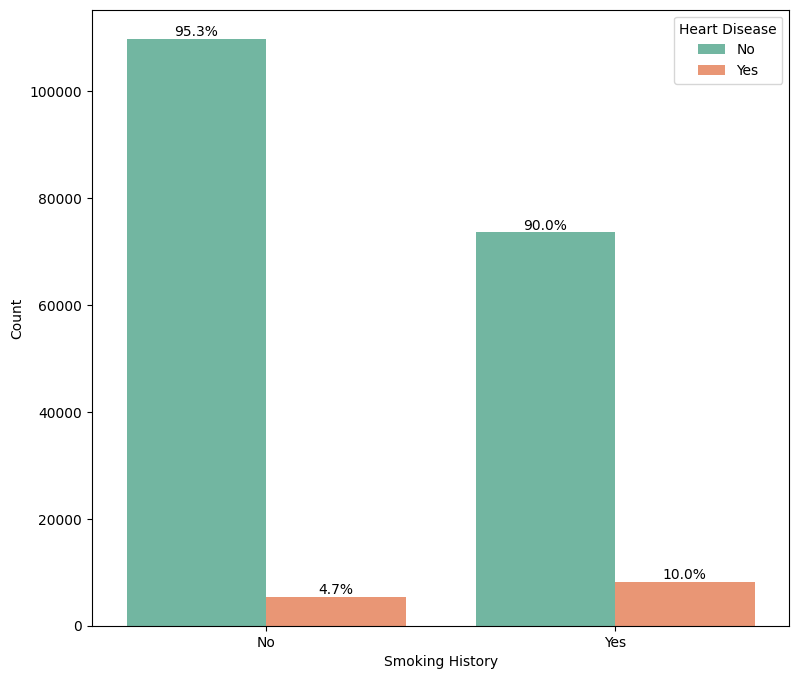

In [47]:

for i in categorical:
        if i == target:
            continue

        if df[i].nunique() > 15:
            print(f'column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue

        if i in df.columns:
            print(f'{i} vs. {target}')
            eda_bivariate_categorical(df,i,target)
            print('=======================================================')

## Prepare Data for Processing

Change Yes/No Heart Disease Responses to 0 and 1 for training

In [48]:
df['Heart Disease'] = df['Heart Disease'].map({'No':0,'Yes':1})
print('')
print(df['Heart Disease'].value_counts())
print(df)


0    183398
1     13615
Name: Heart Disease, dtype: int64
       General Health                  Checkup Skin Cancer Other Cancer  \
0                Fair     Within the past year          No           No   
1           Very Good     Within the past year          No           No   
2                Good     Within the past year          No          Yes   
3                Fair     Within the past year          No           No   
4           Very Good     Within the past year          No           No   
...               ...                      ...         ...          ...   
197008      Very Good     Within the past year          No           No   
197009      Very Good  Within the past 2 years         Yes           No   
197010           Good     Within the past year          No           No   
197011           Good     Within the past year          No           No   
197012           Good  Within the past 2 years          No           No   

       Depression Diabetes Smoking Histo

Split data into testing set and training set. We are using stratify on the set split to maintain ratios.

In [49]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2,random_state=22,stratify=df['Heart Disease'])

print(train.shape)
print(test.shape)

(157610, 16)
(39403, 16)


In [50]:
yes = train['Heart Disease'].value_counts()[0]/len(train['Heart Disease'])*100
no = train['Heart Disease'].value_counts()[1]/len(train['Heart Disease'])*100
print('Train Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')
print('')

yes = test['Heart Disease'].value_counts()[0]/len(test['Heart Disease'])*100
no = test['Heart Disease'].value_counts()[1]/len(test['Heart Disease'])*100
print('Test Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')

Train Set
ratio of people with heart disease to total is 93.08927098534356
ratio of people that dont have heart disease to total is 6.910729014656431

Test Set
ratio of people with heart disease to total is 93.08935867827323
ratio of people that dont have heart disease to total is 6.910641321726772


In [51]:
## Splitting the X and y variables in the train set
X_train = train.drop("Heart Disease", axis=1)
y_train = train["Heart Disease"].copy()

## Splitting the X and y variables in the test set
X_test = test.drop("Heart Disease", axis=1)
y_test = test["Heart Disease"].copy()

In [52]:
X_train.nunique()

General Health            5
Checkup                   4
Skin Cancer               2
Other Cancer              2
Depression                2
Diabetes                  4
Smoking History           2
Alcohol Consumption      30
Exercise                  2
Arthritis                 2
Sex                       2
Age                      13
Height (cm)              87
Weight (kg)             467
BMI                    2989
dtype: int64

In [53]:
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore',drop='first'))

In [54]:
num_pipeline = make_pipeline(
                             FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
                             StandardScaler()
                            )   

In [55]:
## Age Category Pipeline
agecat_pipeline = make_pipeline(
        OrdinalEncoder()
)

## General Health Pipeline
genhealth_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Poor','Fair','Good','Very Good','Excellent']])
)

## Checkup Pipeline
checkup_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']])
)

In [56]:
num_pipe_col = numerical

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
       'Exercise', 'Other Cancer', 'Sex',
       'Skin Cancer', 'Smoking History']

In [57]:
## Combining all the pipelines and creating a main pipeline to enter all the data
preprocessing = ColumnTransformer([
    ('Categorical', cat_pipeline,   cat_pipe_col),
    ('Age',agecat_pipeline,['Age']),
    ('Checkup',checkup_pipeline,['Checkup']),
    ('General Health',genhealth_pipeline,['General Health']),
    ('Numerical',   num_pipeline,  num_pipe_col),
],remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Arthritis', 'Depression', 'Diabetes',
                                  'Exercise', 'Other Cancer', 'Sex',
                                  'Skin Cancer', 'Smoking History']),
                                ('Age',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Age']),
                                ('Checkup',
                                 Pipeline(s...
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]))]),
                                 ['General Health']),
                                ('Numerical',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['BMI', 'Height (cm)', 'Weight (kg)'], dtype='object'))])

In [58]:
## Using preprocessing pipeline
print('Shape before the preprocessing:')
print(X_train.shape)

train_preprocessed = preprocessing.fit_transform(X_train)

print('Shape after the preprocessing:')
print(train_preprocessed.shape)
print(train_preprocessed)

dump(preprocessing, "preprocessing.joblib")

Shape before the preprocessing:
(157610, 15)
Shape after the preprocessing:
(157610, 17)
[[ 0.          0.          0.         ...  1.24881105  0.25919694
   4.        ]
 [ 1.          0.          0.         ... -0.61974669 -1.49078711
   0.        ]
 [ 0.          0.          0.         ... -0.32554901  0.87429047
   3.        ]
 ...
 [ 0.          0.          0.         ... -2.72848414 -2.99579907
   1.        ]
 [ 0.          0.          0.         ...  1.24881105  1.79657371
   2.        ]
 [ 0.          0.          0.         ...  2.19257755  1.81211406
  20.        ]]


['preprocessing.joblib']

In [59]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=22)

In [69]:
#models = {
#    'Logistic_Regression':LogisticRegression(max_iter=10000,random_state=22),
#    'Decision Tree':DecisionTreeClassifier(random_state=22),
#    'Random_Forest':RandomForestClassifier(n_estimators=100,random_state=22),
#    'K-Nearest_Neighbor':KNeighborsClassifier(),
#    'GaussianNB':GaussianNB()
#    # 'MLP_Classifier':MLPClassifier(random_state=22, max_iter=10000) - MLP in current configuration has poor performance compared to the other models
#}

models = {'MLP_Classifier':MLPClassifier(random_state=22, max_iter=10000)}

scores_dict = {}

report_dict = {}

In [70]:
for model_name,model in models.items():
    model_pipeline = make_pipeline(preprocessing,
                              SMOTE(random_state=22),
                              model  
                                )
    scores = cross_val_score(model_pipeline, 
                            X_train, 
                            y_train, 
                            scoring='f1', 
                            cv=kf,
                            verbose=1,
                            n_jobs=-1,
                            )
    model_score_mean = np.mean(scores)
    scores_dict[model_name] = model_score_mean
    print('------------------------------------------------------------')
    print(f'The score for {model_name} is {model_score_mean}')

    ## fitting the pipeline for classification report
    model_pipeline.fit(X_train,y_train)
    
    dump(model_pipeline, 'model.joblib')
    
    prediction = model_pipeline.predict(X_train)
    print(prediction)

    report = classification_report(y_train, prediction, output_dict=True)
    report_dict[model_name] = report
    print('')
    print(f'This is the classification report for {model_name}:')
    report_df = pd.DataFrame(report).T
    print(report_df)
    print('------------------------------------------------------------')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.8s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.9s finished


------------------------------------------------------------
The score for K-Nearest_Neighbor is 0.2570417607210103
[0 0 0 ... 1 0 0]

This is the classification report for K-Nearest_Neighbor:
              precision    recall  f1-score        support
0              0.999913  0.862682  0.926242  146718.000000
1              0.350683  0.998990  0.519132   10892.000000
accuracy       0.872102  0.872102  0.872102       0.872102
macro avg      0.675298  0.930836  0.722687  157610.000000
weighted avg   0.955047  0.872102  0.898108  157610.000000
------------------------------------------------------------


In [62]:
model_columns = list(X_train.columns)
dump(model_columns, 'cols.pkl')

['cols.pkl']

In [63]:
print(df.dtypes)

General Health          object
Checkup                 object
Skin Cancer             object
Other Cancer            object
Depression              object
Diabetes                object
Smoking History         object
Alcohol Consumption      int64
Exercise                object
Heart Disease            int64
Arthritis               object
Sex                     object
Age                     object
Height (cm)            float64
Weight (kg)            float64
BMI                    float64
dtype: object
